In [1]:
import os

import pandas as pd

from pathlib import Path


import statsmodels.api as sm

In [2]:
from oktmo_names import oktmo_names_decode as oktmo_names

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
PATH_DATA = os.path.join(Path.cwd(), 'data')
PATH_SUBM = os.path.join(Path.cwd(), 'submissions')

In [5]:
train = pd.read_csv(os.path.join(PATH_DATA, 'train.csv'),
                    sep = ';',
                    parse_dates=['date'],
                    infer_datetime_format=True,
                    decimal = ',',
                    thousands='\xa0',
                    engine='python',
                   )

items = train.columns.drop(['region', 'oktmo', 'okato', 'date'])
for el in items:
    train[el] = train[el].astype(float)
    
train.shape

(69785, 79)

In [6]:
def get_aver(inp_prod, ignore_Ingush = True):
    
    if ignore_Ingush:
        use_cols = ['date', inp_prod, 'oktmo']
        ignore_oktmo = oktmo_names[26000000000]
        return train[use_cols].query('oktmo != @ignore_oktmo').groupby('date').mean().sort_values(by='date')
    
    use_cols = ['date', inp_prod]        
    return train[use_cols].groupby('date').mean().sort_values(by='date')

In [7]:
def decompose(inp_item, season = []):
    
    decompose_df = get_aver(inp_item)
    if len(season) == 0:
        plt.figure(figsize(18,15))
        sm.tsa.seasonal_decompose(decompose_df[inp_item]).plot()
        print('')
        return 
            
    if not isinstance(season, list):
        season = [season]
    
    for idx in range(len(season)):
        decompose_df = decompose_df.diff(season[idx])[season[idx]:]

    plt.figure(figsize(18,15))
    sm.tsa.seasonal_decompose(decompose_df[inp_item]).plot()
    print('')
        
    return 

# pasta - макароны (средняя взвешенная цена), руб/кг

In [8]:
decompose_df = get_aver('pasta')

<Figure size 1296x1080 with 0 Axes>

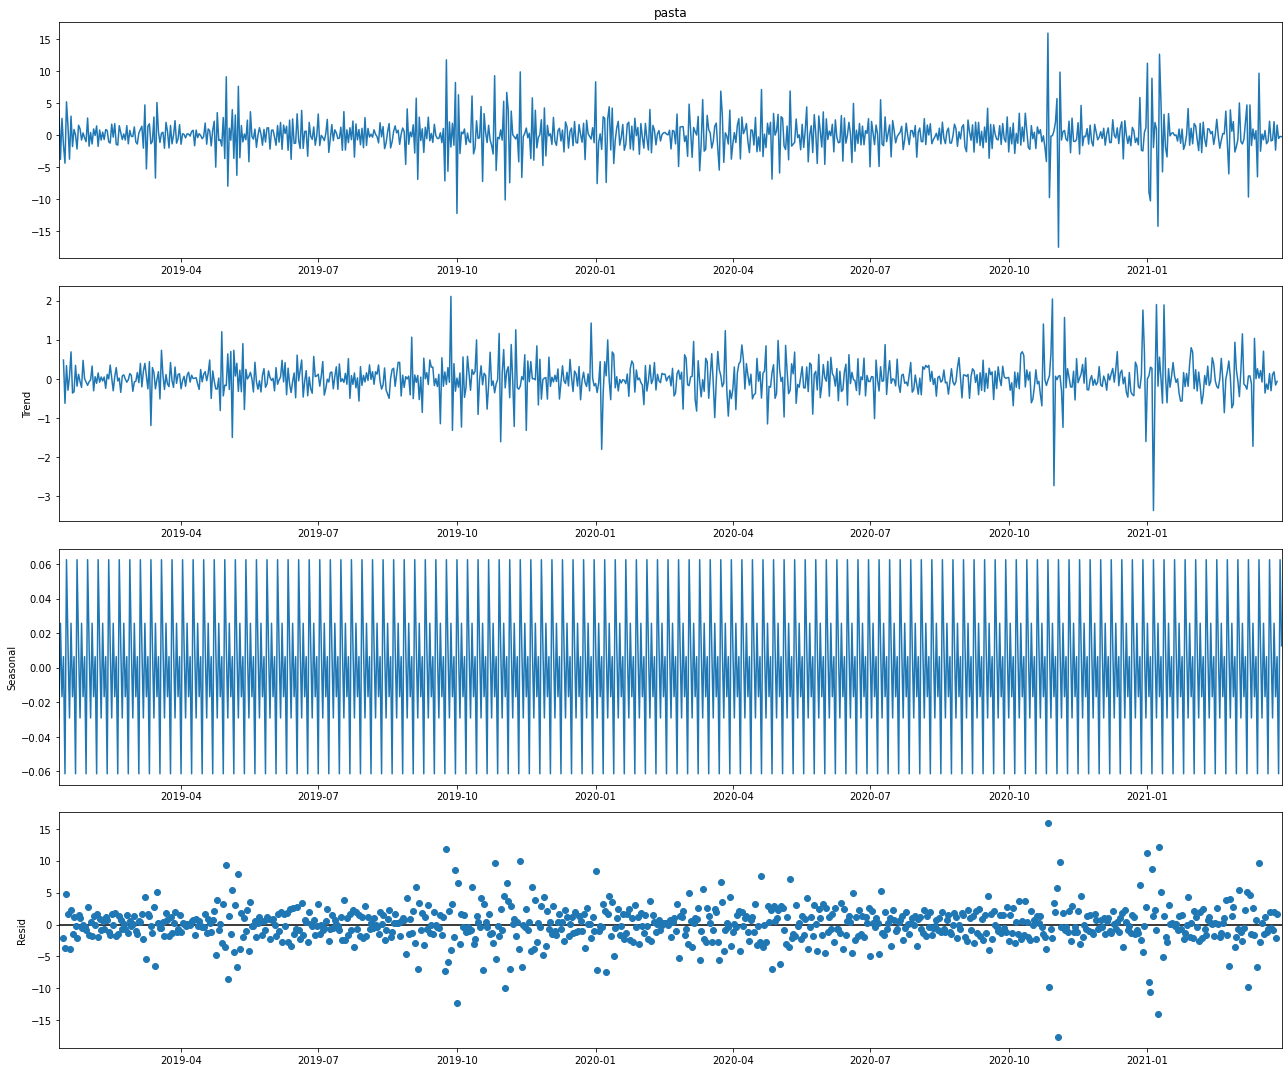

In [9]:
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.pasta.diff(1)[1:].diff(1)[1:].diff(7)[7:]).plot()
print('')

# pasta_value - макароны (объем проданной продукции), кг

In [ ]:
decompose('pasta_value', [1, 7])

# legumes - бобовые, руб/кг

In [ ]:
decompose_df = get_aver('legumes')

In [ ]:
# STRANGE
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.legumes.diff(1)[1:].diff(7)[7:]).plot()
print('')

# legumes_value – бобовые (объем проданной продукции), кг

In [ ]:
decompose('legumes_value', [1, 7])

# bread - хлеб , руб/кг

In [ ]:
decompose_df = get_aver('bread')

In [ ]:
# LIGHT
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.bread.diff(1)[1:].diff(7)[7:]).plot()
print('')

# bread_value – хлеб (объем проданной продукции), кг

In [ ]:
decompose('bread_value', [1, 7])

# flour - мука, руб/кг

In [ ]:
decompose_df = get_aver('flour')

In [ ]:
# STRANGE
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.flour.diff(1)[1:].diff(7)[7:]).plot()
print('')

# flour_value - мука (объем проданной продукции), кг

In [ ]:
# LIGHT
decompose('flour_value', [1, 7])

# rice – рис, руб/кг

In [ ]:
decompose_df = get_aver('rice')

In [ ]:
# STRANGE
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.rice.diff(1)[1:].diff(7)[7:]).plot()
print('')

# rice_value – рис (объем проданной продукции), кг

In [ ]:
# LIGHT
decompose('rice_value', [7]) #without 1???

# groats - другие крупы, руб/кг

In [ ]:
decompose_df = get_aver('groats')

In [ ]:
# ???ELNARGEMENT???
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.groats.diff(1)[1:].diff(7)[7:]).plot()
print('')

# groats_value – другие крупы (объем проданной продукции), кг

In [ ]:
# LIGHT
decompose('groats_value', [7]) # without 1????

# potatoes – картофель, руб/кг

In [ ]:
decompose_df = get_aver('potatoes')

In [ ]:
# STRONG ANNUAL SEASONALITY
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.potatoes.diff(1)[1:].diff(7)[7:]).plot()
print('')

# potatoes_value – картофель (объем проданной продукции), кг

In [ ]:
decompose('potatoes_value', [1, 7])

# сucumbers_tomatoes – огурцы и помидоры, руб/кг

In [ ]:
decompose_df = get_aver('сucumbers_tomatoes')

In [ ]:
# STRONG ANNUAL SEASONALITY
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.сucumbers_tomatoes.diff(1)[1:].diff(7)[7:]).plot()
print('')

# сucumbers_tomatoes_value – огурцы и помидоры (объем проданной продукции), кг

In [ ]:
# STRONG AND STRANGE ANNUAL SEASONALITY
decompose('сucumbers_tomatoes_value', [1, 7])

# vegetables – прочие овощи, руб/кг

In [ ]:
decompose_df = get_aver('vegetables')

In [ ]:
#STRONG ANNUAL SEASONALITY
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.vegetables.diff(1)[1:].diff(7)[7:]).plot()
print('')

# vegetables_value – прочие овощи (объем проданной продукции), кг

In [ ]:
#STRANGE
decompose('vegetables_value', [1, 7])

# roots – столовые корнеплоды, руб/кг

In [ ]:
decompose_df = get_aver('roots')

In [ ]:
#STRONG ANNUAL AND WEEK SEASONALITY
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.roots.diff(1)[1:].diff(7)[7:]).plot()
print('')

# roots_value – столовые корнеплоды (объем проданной продукции), кг

In [ ]:
decompose('roots_value', [1, 7])

# cabbage – капуста, руб/кг

In [ ]:
decompose_df = get_aver('сabbage')

In [ ]:
# ANNOMAL
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.сabbage).plot()
print('')

In [ ]:
# ANNOMAL
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.сabbage.diff(1)[1:].diff(7)[7:]).plot()
print('')

# сabbage_value – капуста (объем проданной продукции), кг

In [ ]:
decompose('сabbage_value', [1, 7])

# fruit – фрукты, руб/кг

In [ ]:
decompose_df = get_aver('fruit')

In [ ]:
# STRANGE AND STRONG ANNUAL SEASONALITY
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.fruit.diff(1)[1:].diff(7)[7:]).plot()
print('')

# fruit_value – фрукты (объем проданной продукции), кг

In [ ]:
# LIGHT. STRONG ANNUAL SEASONALITY
decompose('fruit_value', [1, 7])

# sugar – сахар, руб/кг

In [ ]:
decompose_df = get_aver('sugar')

In [ ]:
# STRANGE
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.sugar.diff(1)[1:].diff(7)[7:]).plot()
print('')

# sugar_value – сахар (объем проданной продукции), кг

In [ ]:
#STRANGE
decompose('sugar_value', [1, 7])

# candy – конфеты, руб/кг

In [ ]:
decompose_df = get_aver('candy')

In [ ]:
# LIGHT
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.candy.diff(1)[1:].diff(7)[7:]).plot()
print('')

# candy_value – конфеты (объем проданной продукции), кг

In [ ]:
decompose('candy_value', [1, 7])

# biscuits – печенье, руб/кг

In [ ]:
decompose_df = get_aver('biscuits')

In [ ]:
# LIGHT. STRONG WEEKLY SEASONALITY
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.biscuits.diff(1)[1:].diff(7)[7:]).plot()
print('')

# biscuits_value – печенье (объем проданной продукции), кг

In [ ]:
# STRAGNE
decompose('biscuits_value', [1, 7])

# mutton – баранина, руб/кг

In [ ]:
decompose_df = get_aver('mutton')

In [ ]:
# STRONG WEEK SEASONALITY
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.mutton.diff(1)[1:].diff(7)[7:]).plot()
print('')

# mutton_value – баранина (объем проданной продукции), кг

In [ ]:
# STRANGE
decompose('mutton_value', [1, 7])

# beef – говядина, руб/кг

In [ ]:
decompose_df = get_aver('beef')

In [ ]:
# LIGHT
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.beef.diff(1)[1:].diff(7)[7:]).plot()
print('')

# beef_value – говядина (объем проданной продукции), кг

In [ ]:
decompose('beef_value', [1, 7])

# chiken – мясо птицы, руб/кг

In [ ]:
decompose_df = get_aver('chicken')

In [ ]:
# STRANGE
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.chicken.diff(1)[1:].diff(7)[7:]).plot()
print('')

# chicken_value – мясо птицы(объем проданной продукции), кг

In [ ]:
decompose('chicken_value', [1, 7])

# pork – свинина, руб/кг

In [ ]:
decompose_df = get_aver('pork')

In [ ]:
#STRANGE
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.pork.diff(1)[1:].diff(7)[7:]).plot()
print('')

# pork_value – свинина (объем проданной продукции), кг

In [ ]:
decompose('pork_value', [1, 7])

# fish – рыба свеж, руб/кг

In [ ]:
decompose_df = get_aver('fish')

In [ ]:
# LIGHT
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.fish.diff(1)[1:].diff(7)[7:]).plot()
print('')

# fish_value – рыба свеж (объем проданной продукции), кг

In [ ]:
decompose('fish_value', [1, 7])

# herring – сельдь, руб/кг

In [ ]:
decompose_df = get_aver('herring')

In [ ]:
# STRONG ANNUAL SEASONALITY
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.herring.diff(1)[1:].diff(7)[7:]).plot()
print('')

# herring_value – сельдь (объем проданной продукции), кг

In [ ]:
# LIGHT
decompose('herring_value', [1, 7])

# curd – творог, руб/кг

In [ ]:
decompose_df = get_aver('curd')

In [ ]:
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.curd.diff(1)[1:].diff(7)[7:]).plot()
print('')

# curd_value – творог (объем проданной продукции), кг

In [ ]:
# STRANGE
decompose('curd_value', [1, 7])

# sour_creame – сметана, руб/кг

In [ ]:
decompose_df = get_aver('sour_creame')

In [ ]:
# STRANGE
plt.figure(figsize(18,15))
#sm.tsa.seasonal_decompose(decompose_df.sour_creame).plot()
sm.tsa.seasonal_decompose(decompose_df.sour_creame.diff(1)[1:].diff(7)[7:]).plot()
print('')

# sour_creame_value – сметана (объем проданной продукции), кг

In [ ]:
#STRANGE
decompose('sour_creame_value', [1, 7])

# butter – масло сливочное, руб/кг

In [ ]:
decompose_df = get_aver('butter')

In [ ]:
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.butter.diff(1)[1:].diff(7)[7:]).plot()
print('')

# butter_value – масло сливочное (объем проданной продукции), кг

In [ ]:
#STRANGE
decompose('butter_value', [1, 7])

# milk_kefir – молоко кефир, руб/л

In [ ]:
decompose_df = get_aver('milk_kefir')

In [ ]:
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.milk_kefir.diff(1)[1:].diff(7)[7:]).plot()
print('')

# milk_kefir_value –молоко кефир (объем проданной продукции), л

In [ ]:
#STRANGE
decompose('milk_kefir_value', [1, 7])

# cheese – сыр, руб/кг

In [ ]:
decompose_df = get_aver('cheese')

In [ ]:
# LIGHT
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.cheese.diff(1)[1:].diff(7)[7:]).plot()
print('')

# cheese_value – сыр (объем проданной продукции), кг

In [ ]:
# LIGHT
decompose('cheese_value', [1, 7])

# egg – яйца, руб/шт

In [ ]:
decompose_df = get_aver('egg')

In [ ]:
# STRANGE
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.egg.diff(1)[1:].diff(7)[7:]).plot()
print('')

# egg_value – яйца (объем проданной продукции), шт

In [ ]:
decompose('egg_value', [1, 7])

# margarin – маргарин и другие жиры, руб/кг

In [ ]:
decompose_df = get_aver('margarine')

In [ ]:
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.margarine.diff(1)[1:].diff(7)[7:]).plot()
print('')

# margarine_value – маргарин и другие жиры (объем проданной продукции), кг

In [ ]:
#STRANGE
decompose('margarine_value', [1, 7])

# oil – масло раститительное, руб/л

In [ ]:
decompose_df = get_aver('oil')

In [ ]:
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.oil.diff(1)[1:].diff(7)[7:]).plot()
print('')

# oil_value – масло раститительное (объем проданной продукции), л

In [ ]:
decompose('oil_value', [1, 7])

# salt – соль, руб/кг

In [ ]:
decompose_df = get_aver('salt')

In [ ]:
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.salt.diff(1)[1:].diff(7)[7:]).plot()
print('')

# salt_value – соль (объем проданной продукции)        , кг

In [ ]:
#STRANGE
decompose('salt_value', [1, 7])

# spice – специи, руб/шт

In [ ]:
decompose_df = get_aver('spice')

In [ ]:
# STRANGE
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.spice.diff(1)[1:].diff(7)[7:]).plot()
print('')

# spice_value – специи (объем проданной продукции), шт

In [ ]:
#STRANGE
decompose('spice_value', [1, 7])

# tea – чай, руб/шт

In [ ]:
decompose_df = get_aver('tea')

In [ ]:
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.tea.diff(1)[1:].diff(7)[7:]).plot()
print('')

# tea_value – чай (объем проданной продукции), шт

In [ ]:
#STRANGE
decompose('tea_value', [1, 7])

# cpi_1

In [ ]:
decompose_df = get_aver('cpi_1')

In [ ]:
# STRONG ANNUAL SEASONALITY
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.cpi_1.diff(1)[1:].diff(7)[7:]).plot()
print('')

# cpi_2

In [ ]:
decompose_df = get_aver('cpi_2')

In [ ]:
# STRONG ANNUAL SEASONALITY
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.cpi_2.diff(1)[1:].diff(7)[7:]).plot()
print('')

# cpi_3

In [ ]:
decompose_df = get_aver('cpi_3')

In [ ]:
# STRONG ANNUAL SEASONALITY
plt.figure(figsize(18,15))
sm.tsa.seasonal_decompose(decompose_df.cpi_3.diff(1)[1:].diff(7)[7:]).plot()
print('')

# ai92 – бензин марки АИ-92, руб/литр

In [ ]:
# ANOMAL
decompose('ai92', )

In [ ]:
decompose('ai92', [1])

# ai92_value – бензин марки АИ-92 (объем проданной продукции), литр

In [ ]:
#STRANGE
decompose('ai92_value', [1, 7])

# ai95 – бензин марки АИ-95, руб/литр

In [ ]:
# ANOMAL
decompose('ai95')

In [ ]:
decompose('ai95', [1, 7])

# ai95_value – бензин марки АИ-95 (объем проданной продукции), литр

In [ ]:
decompose('ai95_value', [1, 7])

# ai98 – бензин марки АИ-98, руб/литр

In [ ]:
# ANOMAL
decompose('ai98')

In [ ]:
# ANOMAL
decompose('ai98', [1, 7])

# ai98_value – бензин марки АИ-98 (объем проданной продукции), литр

In [ ]:
# STRANGE
decompose('ai98_value', [1, 7])

# dt – дизельное топливо, руб/литр 

In [ ]:
# ANOMAL
decompose('dt')

In [ ]:
decompose('dt', [1])

# dt_value – дизельное топливо (объем проданной продукции), литр

In [ ]:
decompose('dt_value', [1, 7])